# Nilearn first steps
got some code from [here](https://nilearn.github.io/stable/auto_examples/03_connectivity/plot_signal_extraction.html#sphx-glr-auto-examples-03-connectivity-plot-signal-extraction-py)

In [28]:
from nilearn import datasets
import matplotlib.pyplot as plt
import pandas as pd

# getting an atlas
dataset = datasets.fetch_atlas_harvard_oxford("cort-maxprob-thr25-2mm")
atlas_filename = dataset.maps
labels = dataset.labels

print(f"Atlas ROIs are located in nifti image (4D) at: {atlas_filename}")

# loading subjects of brain development fMRI data
data = datasets.fetch_development_fmri(n_subjects=10, reduce_confounds=True)
fmri_filenames = data.func[:]
reduced_confounds = data.confounds[:]  # This is a preselected set of confounds
len(labels)

Atlas ROIs are located in nifti image (4D) at: 
<class 'nibabel.nifti1.Nifti1Image'>
data shape (91, 109, 91)
affine:
[[   2.    0.    0.  -90.]
 [   0.    2.    0. -126.]
 [   0.    0.    2.  -72.]
 [   0.    0.    0.    1.]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b''
dim_info        : 0
dim             : [  3  91 109  91   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : uint8
bitpix          : 8
slice_start     : 0
pixdim          : [1. 2. 2. 2. 1. 1. 1. 1.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 0
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b''
aux_file        : b''
qform

49

In [27]:
# checking our confound table
confs = pd.read_csv(reduced_confounds[3], sep = '\t')
confs

,trans_x,trans_y,trans_z,rot_x,rot_y,rot_z,framewise_displacement,a_comp_cor_00,a_comp_cor_01,a_comp_cor_02,a_comp_cor_03,a_comp_cor_04,a_comp_cor_05,csf,white_matter
0,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,888.115852,1105.130123
1,0.043364,-0.004627,-0.295461,0.017107,-0.005228,-0.004033,1.661816,-0.226909,0.225721,-0.159784,0.495244,-0.203295,0.081926,877.886070,1101.531938
2,-0.222734,-0.463251,-0.091295,-0.010030,0.003479,0.001113,2.978318,-0.058335,-0.082628,-0.408610,0.035567,-0.053978,0.110291,882.794589,1097.745243
3,0.054916,-0.110578,0.020140,-0.011213,0.005060,0.005740,1.111350,0.034411,0.014280,-0.453197,0.123546,-0.057229,0.076773,866.543036,1098.084896
4,0.083561,0.158090,-0.293610,-0.014796,0.000207,0.004946,1.072585,0.081336,0.082460,0.014026,-0.042510,-0.090435,0.033876,880.480910,1112.724097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,0.142960,-0.044273,-0.458303,-0.004332,-0.005163,-0.000512,1.329206,-0.103055,0.021623,0.263508,0.039977,-0.305690,0.082325,904.457383,1112.212927
164,0.034067,-0.475188,-0.026823,-0.004769,-0.000074,0.002938,1.420065,-0.026827,-0.014335,0.049132,-0.044770,0.071374,-0.176742,898.171455,1111.676289
165,-0.004536,0.001867,-0.026423,-0.008801,0.002962,0.003130,0.879044,0.034397,0.013229,0.054052,-0.001109,0.025747,0.074587,889.883882,1111.151216
166,0.000366,-0.188357,-0.006437,-0.008739,0.003898,0.003261,0.271521,0.042139,-0.028516,0.014165,-0.036152,0.031756,0.073093,901.809547,1110.274550


In [42]:
# creating an empty list
our_list = []
# filling it with Pizza and Drinks by using append repeatedly
# TODO make this nicer by using a for loop
our_list.append('Pizza')
our_list.append('Drinks')
our_list.append('Pizza')
our_list.append('Drinks')
our_list.append('Pizza')
our_list.append('Drinks')
our_list.append('Pizza')
our_list.append('Drinks')
our_list

['Pizza', 'Drinks', 'Pizza', 'Drinks', 'Pizza', 'Drinks', 'Pizza', 'Drinks']

In [36]:
from nilearn.maskers import NiftiLabelsMasker

# initializing a Masker object
masker = NiftiLabelsMasker(
    labels_img=atlas_filename,
#     standardize="zscore_sample",
#     standardize_confounds="zscore_sample",
    memory="nilearn_cache",
    verbose=5,
)

# Here we go from nifti files to the signal time series in a numpy
# array. Note how we give confounds to be regressed out during signal
# extraction

# TODO: Improve this for loop
time_series = []
i = 0
for item in fmri_filenames:
        time_series.append(masker.fit_transform(item, confounds=reduced_confounds[i], ))
        i +=1 # same as i = i+1
        print(i)
        #if i 

[NiftiLabelsMasker.wrapped] loading data from Nifti1Image(
shape=(91, 109, 91),
affine=array([[   2.,    0.,    0.,  -90.],
       [   0.,    2.,    0., -126.],
       [   0.,    0.,    2.,  -72.],
       [   0.,    0.,    0.,    1.]])
)
Resampling labels
[Memory]0.2s, 0.0min    : Loading _filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
1
[NiftiLabelsMasker.wrapped] loading data from Nifti1Image(
shape=(91, 109, 91),
affine=array([[   2.,    0.,    0.,  -90.],
       [   0.,    2.,    0., -126.],
       [   0.,    0.,    2.,  -72.],
       [   0.,    0.,    0.,    1.]])
)
[Memory]0.5s, 0.0min    : Loading _filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
2
[NiftiLabelsMasker.wrapped] loading data from Nifti1Image(
shape=(91, 109, 91),
affine=array([[   2.,    0.,    0.,  -90.],
       [   0.,    2.,    0., -126.],
       [   0.,    0.,    2.,  -72.],
       [   0.,    0.,    0.,

In [47]:
# checking the shape of our extracted timeseries
time_series[0].shape

(168, 48)

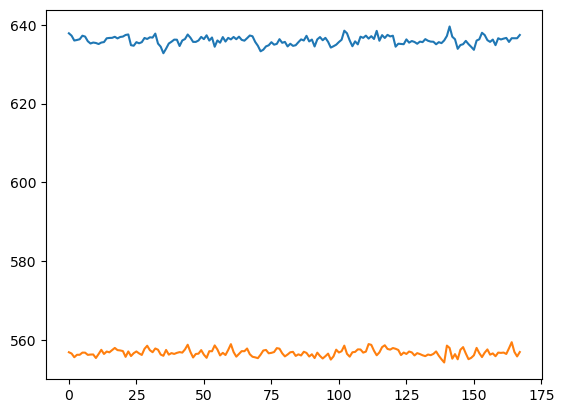

In [30]:
# plotting a timeseries
plt.plot(time_series[:,0])
plt.plot(time_series[:,1])

In [26]:
# checking atlas labels
labels

['Background',
 'Frontal Pole',
 'Insular Cortex',
 'Superior Frontal Gyrus',
 'Middle Frontal Gyrus',
 'Inferior Frontal Gyrus, pars triangularis',
 'Inferior Frontal Gyrus, pars opercularis',
 'Precentral Gyrus',
 'Temporal Pole',
 'Superior Temporal Gyrus, anterior division',
 'Superior Temporal Gyrus, posterior division',
 'Middle Temporal Gyrus, anterior division',
 'Middle Temporal Gyrus, posterior division',
 'Middle Temporal Gyrus, temporooccipital part',
 'Inferior Temporal Gyrus, anterior division',
 'Inferior Temporal Gyrus, posterior division',
 'Inferior Temporal Gyrus, temporooccipital part',
 'Postcentral Gyrus',
 'Superior Parietal Lobule',
 'Supramarginal Gyrus, anterior division',
 'Supramarginal Gyrus, posterior division',
 'Angular Gyrus',
 'Lateral Occipital Cortex, superior division',
 'Lateral Occipital Cortex, inferior division',
 'Intracalcarine Cortex',
 'Frontal Medial Cortex',
 'Juxtapositional Lobule Cortex (formerly Supplementary Motor Cortex)',
 'Subcallo

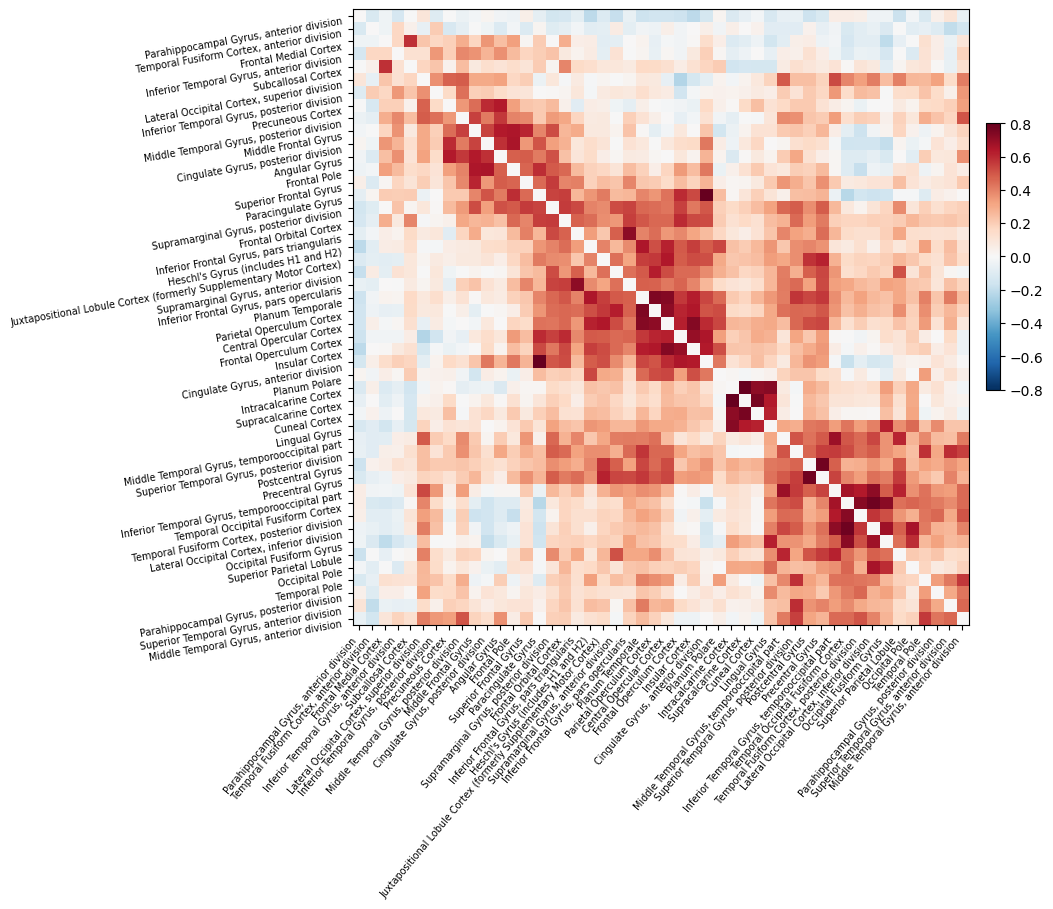

In [32]:
from nilearn.connectome import ConnectivityMeasure

# intializing the ConnectivityMeasure object
correlation_measure = ConnectivityMeasure(
    kind="correlation",
#     standardize="zscore_sample",
)

# get the correlation matrix out
correlation_matrix = correlation_measure.fit_transform([time_series])[0]

# Plot the correlation matrix
import numpy as np
from nilearn import plotting

# Make a large figure
# Mask the main diagonal for visualization:
np.fill_diagonal(correlation_matrix, 0)
# The labels we have start with the background (0), hence we skip the
# first label
# matrices are ordered for block-like representation
plotting.plot_matrix(
    correlation_matrix,
    figure=(10, 8),
    labels=labels[1:],
    vmax=0.8,
    vmin=-0.8,
#     title="Confounds",
    reorder=True,
)